# A random assortment of statistics and probability examples
__1. Birthday paradox__
<br>__2. Coupon collector's problem__
<br>__3. Poisson and exponential events probabilities__
<br>__4. Goodness of fit: chi-squared and k-s tests__
<br>__5. Jeep problem__

In [106]:
import numpy as np
import scipy.stats
import sys
import matplotlib.pyplot as plt

### 1. Birthday paradox
Probability of having the same birthday.
<br>Some cool algebra tricks wth help of Taylor expansion of exp(x)
<br>https://betterexplained.com/articles/understanding-the-birthday-paradox/

In [2]:
### Probability given number people in room
days_in_year: int = 365
people_in_room: int = 6

prob_different = np.exp(-1*(people_in_room ** 2 / (2 * days_in_year)))
prob_same = 1 - prob_different
prob_same

0.04811882531956668

In [3]:
### How many people to get certain probability
desired_prob_same = 0.9

prob_different = 1 - desired_prob_same
# 0 = people_in_room^2 - people_in_room + 2 * days_in_year * np.ln(prob_different)
people_in_room = 1 + np.sqrt(1**2 - 4 * 1 * 2 * days_in_year * np.log(prob_different)) / (2 * 1)
people_in_room

42.00167213523923

### 2. Coupon collector's problem
Approach: work back from probabilities of getting the next unpossessed coupon.
<br>(Number of coupons required is reciprocal to probability of getting needed coupons.)
<br>Thanks to algebra, the summation simplifies to a quantity including the harmonic number of coupons.
<br>https://brilliant.org/wiki/coupon-collector-problem/

In [4]:
number_coupons: int = 10

def harmonic_num(x: int):
    harmonic_number: float = 0.0
    for i in range(x):
        harmonic_number += 1/(i + 1)
    return harmonic_number
number_times: float = number_coupons * harmonic_num(number_coupons)
np.round(number_times, 3)

29.29

### 3. Poisson events and exponential time between events
<br>References: Wiki articles for poisson and exponential distributions
<br>https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution

__Baseball no-hitters events__
<br>[sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf](sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf)
<br>49 no-hitters in 40 years 1920-1959; over 280 months of baseball season
<br>lambda = 1.225 no-hitters per year
<br>lambda = 0.175 no-hitters per month

In [5]:
avg_event_rate = 49/280 # lambda: the number occurences per time period

### Poisson: probability of a given number of events occuring
number_events_per_time_interval_to_investigate: int = 0
    
def poisson_pdf(rate, number_events_to_check):
    return (rate ** number_events_to_check * 
            np.exp(-1 * rate) /
            np.math.factorial(number_events_to_check))
    
prob_of_that_number_of_events = poisson_pdf(rate = avg_event_rate, 
                                            number_events_to_check = number_events_per_time_interval_to_investigate)

prob_of_that_number_or_fewer_events = 0
for i in range(number_events_per_time_interval_to_investigate + 1):
    prob_of_that_number_or_fewer_events += \
    poisson_pdf(rate = avg_event_rate, 
                number_events_to_check = i)

print("Avg number events per time period:", 
      np.round(avg_event_rate, 3))
print("Number of events in that time period to investigate:", number_events_per_time_interval_to_investigate)
print("Prob_of_that_number_of_events:", 
      np.round(prob_of_that_number_of_events, 3))
print("Prob_of_that_number_or_fewer_events (including 0):", 
      np.round(prob_of_that_number_or_fewer_events, 3))

Avg number events per time period: 0.175
Number of events in that time period to investigate: 0
Prob_of_that_number_of_events: 0.839
Prob_of_that_number_or_fewer_events (including 0): 0.839


In [6]:
avg_event_rate = 49/280 # lambda: the number occurences per time period

### Exponential: time between events
time_to_investigate = 1/7 # 7 months in mlb season

prob_of_that_exact_time_between_occurences = avg_event_rate * np.exp(-1 * avg_event_rate * time_to_investigate)
prob_of_time_between_occurences = 1 - np.exp(-1 * avg_event_rate * time_to_investigate) # this amount of time or less

avg_time_between_events = 1 / avg_event_rate
median_time_between_events = np.log(2) / avg_event_rate
median_time_between_events

print("Avg number events per time period:", 
      np.round(avg_event_rate, 3))
print("Time between events to investigate:", 
      np.round(time_to_investigate, 3))
# print("Prob_density_at_that_exact_time_between_occurences:", 
#       np.round(prob_of_that_exact_time_between_occurences, 3))
print("Prob_of_that_time_or_less_between_events (including 0):", 
      np.round(prob_of_time_between_occurences, 3))
print("Avg_time_between_events:", 
      np.round(avg_time_between_events, 3))
print("Probability of avg time or less between events:", 
      np.round(1 - np.exp(-1 * avg_event_rate * avg_time_between_events), 3))
print("Median_time_between_events", 
      np.round(median_time_between_events, 3))

Avg number events per time period: 0.175
Time between events to investigate: 0.143
Prob_of_that_time_or_less_between_events (including 0): 0.025
Avg_time_between_events: 5.714
Probability of avg time or less between events: 0.632
Median_time_between_events 3.961


### 4. Goodness of fit
Chi-squared test for deviation from expected distribution
<br>Only for binned/categorical data
<br>[sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf](sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf)
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [7]:
observed_array = [11, 15, 9, 4, 1]
expected_array = [11.75, 14.39, 8.8164, 3.6, 1.1025]
dof_adjustment = 1 # +1 if also estimating mean for poisson from sample data

print("If pvalue below 0.05, observations do not belong to expected distribution.")
print("P-value =",
      scipy.stats.chisquare(f_obs = observed_array,
                            f_exp = expected_array,
                            ddof = dof_adjustment)[1])

If pvalue below 0.05, observations do not belong to expected distribution.
P-value = 0.9878024170265235


Goodness of fit for continuous variables
<br>https://stats.stackexchange.com/questions/76350/goodness-of-fit-for-continuous-variables

Scipy kstest
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

List of continuous distributions in scipy
<br>https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [8]:
scipy.stats.kstest(rvs = scipy.stats.uniform.rvs(size=1000, random_state = 12345),
                  cdf = "norm",
                  #args = (1, 1),
                   # N = 20,
                  alternative = 'two-sided',
                  mode = 'approx')

KstestResult(statistic=0.5000427891604897, pvalue=9.655302994802462e-232)

Named tuple
<br>https://docs.python.org/2/library/collections.html

In [9]:
import collections
norm_args = collections.namedtuple('norm_args', ['loc', 'scale'])

In [10]:
scipy.stats.kstest(rvs = scipy.stats.norm.rvs(loc = 1,
                                              scale = 1,
                                              size = 1000, 
                                              random_state = 12345),
                  cdf = "norm",
                  args = norm_args(loc=1, scale=1),
                   # N = 20,
                  alternative = 'two-sided',
                  mode = 'approx')

KstestResult(statistic=0.02526609656624318, pvalue=0.5457961444206735)

In [11]:
uniform_args = collections.namedtuple('uniform_args', ['loc', 'scale'])

In [12]:
scipy.stats.kstest(rvs = scipy.stats.uniform.rvs(loc = 1,
                                                 scale = 1,
                                                 size=1000, 
                                                 random_state = 12345),
                  cdf = "uniform",
                  args = uniform_args(loc=1, scale=1),
                   # N = 20,
                  alternative = 'two-sided',
                  mode = 'approx')

KstestResult(statistic=0.014856419814211264, pvalue=0.9800639362901664)

__5. Jeep problem__
<br>https://en.wikipedia.org/wiki/Jeep_problem

In [13]:
desert_width = 5

def dist_explore(num_trips):
    return harmonic_num(x = num_trips) / 2

def dist_cross(num_trips):
    final_trip_distance = 0.0
    for i in range(num_trips):
        final_trip_distance += 1 / (2 * (i + 1) - 1)
    return final_trip_distance

resultant_distance = 0.0
n_trips_to_explore = 0
while resultant_distance < desert_width:
    n_trips_to_explore += 1
    resultant_distance = dist_explore(num_trips = n_trips_to_explore)

resultant_distance = 0.0
n_trips_to_cross = 0
while resultant_distance < desert_width:
    n_trips_to_cross += 1
    resultant_distance = dist_cross(num_trips = n_trips_to_cross)

print(n_trips_to_explore, "trips needed to explore")
print(n_trips_to_cross, "trips needed to cross")

12367 trips needed to explore
3092 trips needed to cross


### 5. Streaks
What's the probability of a given success or fail streak?
<br>(This is a nice problem to introduce Markov Chains, but the chain is slower to compute.)
<br>https://www.askamathematician.com/2010/07/q-whats-the-chance-of-getting-a-run-of-k-successes-in-n-bernoulli-trials-why-use-approximations-when-the-exact-answer-is-known/

In [21]:
sys.setrecursionlimit(20000)

def prob_of_streak(num_trials, streak_length, prob_success, saved = None):
    if saved == None: saved = {}
    
    ID = (num_trials, streak_length, prob_success)
    
    if ID in saved: return saved[ID]
    else:
        if streak_length > num_trials or num_trials <= 0:
            result = 0
        else:
            result = prob_success ** streak_length
            for first_fail in range(1, streak_length + 1):
                pr = prob_of_streak(num_trials = num_trials - first_fail,
                                   streak_length = streak_length,
                                   prob_success = prob_success,
                                   saved = saved)
                result += (prob_success ** (first_fail - 1)) * (1 - prob_success) * pr
        saved[ID] = result
        
        return result    

Test function with single iteration

In [31]:
p_success = 0.350 # -.350 on base %
n_trials = 650    # plate appearances per year

prob_of_streak(num_trials = n_trials, 
               streak_length = 650, 
               prob_success = p_success)

4.407870509145775e-297

In [111]:
def prob_streak_list(prob_success, n_trials):
    probs_success_streak = [prob_of_streak(num_trials = n_trials, 
                                       streak_length = 1,
                                       prob_success = prob_success)]

    i = 2
    while i <= n_trials:
        if probs_success_streak[i - 2] <= 0.0001:
            probs_success_streak.append(0.0)
            i += 1
        elif probs_success_streak[i - 2] >= 0.999:
            tmp = prob_of_streak(num_trials = n_trials, 
                                 streak_length = i + 1,
                                 prob_success = prob_success)
            if tmp >= 0.999:
                probs_success_streak.append((probs_success_streak[i - 2] + tmp) /2)
                probs_success_streak.append(tmp)
                i += 2
            else:
                probs_success_streak.append(prob_of_streak(num_trials = n_trials, 
                                                       streak_length = i,
                                                       prob_success = prob_success))
                probs_success_streak.append(tmp)
                i += 2
        else:
            probs_success_streak.append(prob_of_streak(num_trials = n_trials, 
                                                   streak_length = i,
                                                   prob_success = prob_success))
            i += 1
    return [x for x in probs_success_streak if x > 0]

def prob_streak_lists(prob_success, n_trials):
    return [prob_streak_list(prob_success_i, n_trials) for prob_success_i in [prob_success, 1 - prob_success]]

__Baseball hits example__

In [117]:
p_success = 0.350 # 0.350 on base %
num_trials =  650    # plate appearances per year
streak_list_results = prob_streak_lists(prob_success =  p_success,
                                        n_trials = num_trials)

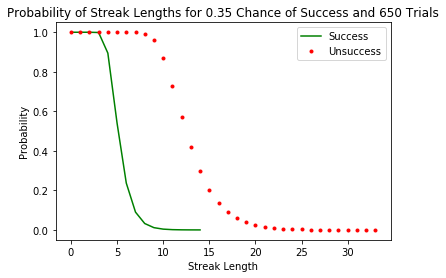

In [118]:
plt.plot([i for i in range(len(streak_list_results[0]))], streak_list_results[0],
               label = 'Success',
               linestyle = '-', color = 'green')
plt.plot([i for i in range(len(streak_list_results[1]))], streak_list_results[1],
               label = 'Unsuccess',
               linestyle = '', marker = '.', color = 'red')
plt.xlabel('Streak Length')
plt.ylabel('Probability')
plt.title('Probability of Streak Lengths for ' + str(p_success) + " Chance of Success and " +
         str(num_trials) + " Trials")
plt.legend()
plt.show()

Check slump results

In [127]:
streak_list_results[1][0:14]

[0.9999999999999999,
 0.9999999999999996,
 0.9999999999999992,
 0.9999999449108014,
 0.9999998898216035,
 0.9993096541152457,
 0.9651620371252608,
 0.7901422230651655,
 0.5178250753321768,
 0.28938836039641963,
 0.14803212902870602,
 0.07242353143346959,
 0.03467680946635618,
 0.016434053167195345]

Even an exceptional hitter should expect 8-9 in-a-row slump during the season.

But if a batter is in a 14-straight slump with a season average of 0.350, they probably are actually in a slump.

__Basketball shots example__

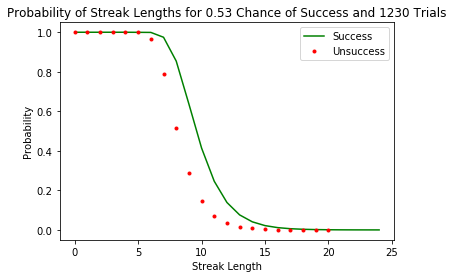

In [119]:
p_success = 0.53 # 53% field goal percentage
num_trials =  15 * 82 # 15 field goals attempted per game, 82 games per season 
streak_list_results = prob_streak_lists(prob_success =  p_success,
                                        n_trials = num_trials)

plt.plot([i for i in range(len(streak_list_results[0]))], streak_list_results[0],
               label = 'Success',
               linestyle = '-', color = 'green')
plt.plot([i for i in range(len(streak_list_results[1]))], streak_list_results[1],
               label = 'Unsuccess',
               linestyle = '', marker = '.', color = 'red')
plt.xlabel('Streak Length')
plt.ylabel('Probability')
plt.title('Probability of Streak Lengths for ' + str(p_success) + " Chance of Success and " +
         str(num_trials) + " Trials")
plt.legend()
plt.show()

In [125]:
streak_list_results[0][0:15]

[1.0,
 0.9999999999999996,
 0.9999999999999992,
 0.9999999999992637,
 0.9999999999985283,
 0.9995714941544882,
 0.999142988310448,
 0.9746329050304372,
 0.8541837388875277,
 0.6369811014505753,
 0.41412608868743445,
 0.24612583888598696,
 0.13880432660110342,
 0.07603274776428774,
 0.04099623343587418]

So, a player who shoots 53% from the field career, should have a 10 shot streak in 64% of seasons.
<br>If they don't, then their accuracy was changing season to season.

Another way, if they shot 53% for the season but had a 15 shot streak, their accuracy inconsistent through the season.